<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"><img src="https://github.com/lina-usc/scinbre-python-2025/blob/main/inbre-header.png?raw=1" alt="inbre-header" border="0"></a>


### Introduction to Python
### May 22nd, 2025

# First hour - Data Frames with Pandas

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is the Excel of Python data science. It is an essential tool for keeping data organized and for data manipulation and analysis. Whether you are cleaning data, transforming it, or performing complex statistical operations, pandas provides the tools needed to efficiently manage and analyze large datasets.

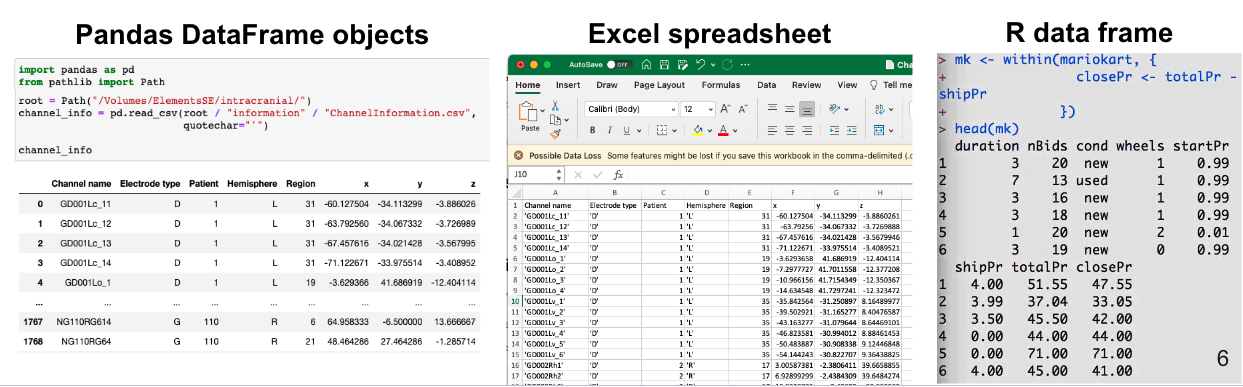

 To start let us import NumPy (from yesterday) and Pandas.

In [ ]:
import numpy as np
import pandas as pd

## Pandas Series

The first structure we will learn in Pandas is a Series. It is a one-dimensional array-like object and can hold various data types. It is similar to a list or a one-dimensional NumPy array but with additional features similar to dictionaries. Here are some key characteristics of a Pandas Series:

- **Labels (Indexing)**: Each element in a Series has a unique label that can be used for indexing. By default, the index is a range of integers starting from 0, but you can also specify custom labels, including non-numerical (e.g., strings) labels.
- **Homogeneous Data**: All elements in a Series are of the same data type (as NumPy arrays; as opposed to lists and dictionaries). This type can be generic (i.e., "object"), but the functionalities are reduced in that case.
- **Data Alignment**: Series automatically aligns data based on the index when performing operations with other Series.
- **Computational Efficiency:** Pandas Series is built on the top of NumPy arrays and, therefore, inherits the computational efficiency of the latter.

### Creating Pandas Series

In [ ]:
print("From a list:")
data = [10, 20, 30, 40]
series_from_list = pd.Series(data)
print(series_from_list)

In [ ]:
print("From a NumPy array:")
array = np.array([1, 2, 3, 4])
series_from_array = pd.Series(array)
print(series_from_array)

In [ ]:
print("From a dictionary:")
data_dict = {'a': 1, 'b': 2, 'c': 3}
series_from_dict = pd.Series(data_dict)
print(series_from_dict)

In [ ]:
print("From a scalar value (MUST specify index):")
series_from_scalar = pd.Series(5, index=['a', 'b', 'c'])
print(series_from_scalar)

In [ ]:
s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
print("s = \n", s, sep="")
print(" ")

x = s[1:]   # Same as s, but without the first item ('a')
y = s[:-1]  # Same as s, but without the last item ('e')
print(x + y) #Note how the Series we automatically aligned by index

Visualization of what is going on here:
```
 Na    |1|    |Na|
|2|    |2|     |4|
|3| +  |3|  =  |6|
|4|    |4|     |8|
|5|     Na    |Na|
```



In [ ]:
# Be careful! When indexing with the explicit index,
# the stop argument of the slice is inclusive!!!
s["b":"d"]

## Pandas DataFrame

A **Pandas DataFrame** is a two-dimensional, tabular data structure with labeled axes (rows and columns). You can think of it as an in-memory representation of an Excel spreadsheet or SQL table. Here are some key characteristics of a DataFrame:

- **Rows and Columns**: DataFrames have both rows and columns, each with labels.
- **Data Types defined by Columns and Rows**: Different rows and columns can have different data types (integers, floats, strings, etc.) from one another. Their type default to the most narrow types able to capture the variability of data. The most generic type is "object". Homogeneous, narrowly defined types provide more functionalities.
- **Labeled Axes**: Both rows and columns have labels, which makes it easier to access and manipulate data.
- **Flexible Indexing**: You can perform operations on DataFrames based on labels (explicit index) or positions (implicit index).


### Creating a DataFrame
You can create a DataFrame from various sources like dictionaries, lists, NumPy arrays, or another DataFrame. Here are some examples:


In [ ]:
print("From a dictionary of lists:")
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [15, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
df


In [ ]:
print("From a list of dictionaries:")
data = [
    {'Name': 'Alice', 'Age': 15, 'City': 'New York'},
    {'Name': 'Bob', 'City': 'Los Angeles'},  # Keys can be missing, like Age here.
    {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'}
]
df_from_list_of_dicts = pd.DataFrame(data)
df_from_list_of_dicts

In [ ]:
print("From a NumPy array:")
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
df_from_array = pd.DataFrame(data, columns=['A', 'B', 'C'])
df_from_array


You can treat a DataFrame like a dicionary of Series sharing a same index. Getting, setting, and deleting columns works with the same syntax as it would with a dictionary of columns.

In [ ]:
df['Name']

Adding a new column:

In [ ]:
df["Teens"] = (df["Age"] >= 13) & (df["Age"] < 20)  # & is an element-wise logical AND
df

**Note:** Remember that Jupyter notebooks always display what is returned by the last instruction. This display is often "richer" than what you would obtain with a simple print. Notice the difference between this Jupyter internal display and the display obtained with `print()`:

In [ ]:
print(df)

Removing a column:

In [ ]:
del df["Teens"]
df

### Indexing/selection

The basics of indexing are as follows:

<table style="width:100%;">
<colgroup>
<col style="width: 50%" />
<col style="width: 33%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>Operation</th>
<th>Syntax</th>
<th>Result</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Select column</td>
<td><code>df[col_label]</code></td>
<td>Series</td>
</tr>
<tr class="even">
<td>Select row by row using the explicit index</td>
<td><code>df.loc[row_label]</code></td>
<td>Series</td>
</tr>
<tr class="odd">
<td>Select an item using the explicit index</td>
<td><code>df.loc[row_label, col_label]</code></td>
<td>Series</td>
</tr>
<tr class="even">
<td>Select row using the implicit index</td>
<td><code>df.iloc[row_idx]</code></td>
<td>Series</td>
</tr>
</tr>
<tr class="odd">
<td>Select an item using the implicit index</td>
<td><code>df.iloc[row_idx, col_idx]</code></td>
<td>Series</td>
</tr>
<tr class="even">
<td>Slice rows</td>
<td><code>df[5:10]</code></td>
<td>DataFrame</td>
</tr>
<tr class="odd">
<td>Select rows by boolean vector</td>
<td><code>df[bool_vec]</code></td>
<td>DataFrame</td>
</tr>
</tbody>
</table>

[Taken from https://pandas.pydata.org/docs/user_guide/dsintro.html]

In [ ]:
# iloc uses the "implicit index". It operates the same way as the index of numpy array
df.iloc[1]  # Second row

In [ ]:
df['Age']  # Column Age

In [ ]:
df.iloc[1,2]  # Second row, third column

An index can be set using the `.set_index()` method

In [ ]:
# Setting the column Name as a row index
# Saving the modified DataFrame back in the variable df
df = df.set_index("Name")
df

In [ ]:
# Now we can use a more meaningful row index than the
# original numeric one.
# .loc uses the explicit index
df.loc["Bob", "City"]

The index can be reset using the `.reset_index()` method

In [ ]:
df.reset_index()  # "name" is no longer the index

### Combining Series and DataFrame
Pandas provides various methods for combining Series or DataFrame.

Let us explore one of these! Additional methods are explained in the extra section.

#### Concat
The `pd.concat` function is used to concatenate DataFrames or Series along a particular axis (rows or columns).

In [ ]:
df1 = pd.DataFrame(
    {
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
  )

df2 = pd.DataFrame(
    {
      "A": ["A4", "A5", "A6", "A7"],
      "B": ["B4", "B5", "B6", "B7"],
      "C": ["C4", "Cocky", "C6", "C7"],
      "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
  )

print("df1:\n")
df1

In [ ]:
print("df2:\n")
df2

In [ ]:
result = pd.concat([df1, df2], axis=0)# Concatenate along rows
print("Result with axis=0 (along rows):\n")
result

In [ ]:
result = pd.concat([df1, df2], axis=1)# Concatenate along col
print("Result with axis=1 (along columns):\n")
result

## Exercises

1. Create two DataFrames, ```df3``` and ```df4```, with the following data:

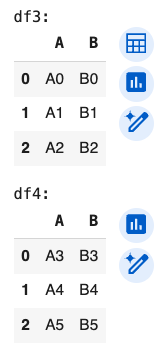

In [2]:
import pandas as pd

df3 = pd.DataFrame({
    "A": ['A0', 'A1', 'A2'],
    "B": ['B0', 'B1', 'B3']
})

df4 = pd.DataFrame({
    'A': ['A3', 'A4', 'A5'],
    'B': ['B3', 'B4', 'B5']
 })

print("df3")
print(df3)

print("df4")
print(df4)

df3
    A   B
0  A0  B0
1  A1  B1
2  A2  B3
df4
    A   B
0  A3  B3
1  A4  B4
2  A5  B5


2. Concatenate df3 and df4 along the rows.

In [3]:
pd.concat([df3, df4])

A   B
0  A0  B0
1  A1  B1
2  A2  B3
0  A3  B3
1  A4  B4
2  A5  B5

3. Concatenate df3 and df4 along the columns.

In [4]:
pd.concat([df3, df4], axis=1)

A   B   A   B
0  A0  B0  A3  B3
1  A1  B1  A4  B4
2  A2  B3  A5  B5


4. Concatenate df3 and df4 along the rows using the extra argument `keys=['Group1', 'Group2']` in the `pd.concat` call. Look at what is the effect of this extra argument.

In [10]:
result = pd.concat([df3, df4], keys=['Group1', 'Group2'])

print (result)

           A   B
Group1 0  A0  B0
       1  A1  B1
       2  A2  B3
Group2 0  A3  B3
       1  A4  B4
       2  A5  B5


5. Create a pandas Series named ```temperatures``` with the following data, where the index represents different cities and the values represent the temperature in Celsius:

New York: 21

Los Angeles: 24

Chicago: 19

Houston: 29

Phoenix: 35

Perform the following tasks:

- a. Print the temperature of Los Angeles.
- b. Update the temperature of Chicago to 20.
- c. Print all temperatures greater than 25.
- d. Add a new city, Miami, with a temperature of 31 to the Series.
- e. Remove the Phoenix entry from the Series.
- f. Print the Series sorted by the city names. Note: we did not discuss the function for sorting series. See if you can find it on Google.






In [42]:
temperatures = pd.Series({
    'New York' : 21,
    'Los Angeles' : 24,
    'Chicago' : 19,
    'Houston' : 29,
    'Phoenix': 35

})

print ("The Temperature in Los Angeles is:", temperatures['Los Angeles'])

temperatures['Chicago'] = 20

print ("Temperatures greater than 25:\n", temperatures[temperatures > 25])

print('\n')

temperatures['Miami'] = 31

temperatures = temperatures.drop('Phoenix')

print("Temperarures sorted by city names:\n", temperatures.sort_index())

The Temperature in Los Angeles is: 24
Temperatures greater than 25:
 Houston    29
Phoenix    35
dtype: int64


Temperarures sorted by city names:
 Chicago        20
Houston        29
Los Angeles    24
Miami          31
New York       21
dtype: int64


# Second hour - Examples

We will now work with a more complete example. We will download two .csv files. One represents the number of babies born in Canada between years 2015 and 2023. The other represents the number of deaths in Canada for the corresponding years.

In [ ]:
#how we load the data
import pandas as pd

# "Statistics Canada. Table 17-10-0016-01  Estimates of births, by gender, annual"
# From https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710001601
url_births = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_births.csv"

# "Statistics Canada. Table 17-10-0006-01  Estimates of deaths, by age and gender, annual"
# https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000601
url_deaths = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_deaths.csv"

df_b = pd.read_csv(url_births, thousands=",")
# The first argument can be a local file or a URL.
# We used the extra arguments thousands to tell Pandas that this dataset has
# numbers using the comma as a separator for thousands. Otherwise, pandas would not
# recognize these values as numbers and would store them as strings.
# pd.read_csv has MANY bells and whistles to manage various conditions. Use the
# help or the online documentation when necessary.

print(df_b.shape) # Tells us the shape of our data
df_b.head() # Used to display the first rows (5, by default) of a df

This is how we got the table from the Canadian statistics website but we can improve this table by:
1. Using the Gender columns as an index.
2. Transposing the table.
3. Renaming the columns `'total_birth'`, `'men_birth'` and `'women_birth'`


In [ ]:
df_b = df_b.set_index("Gender").T  # 1 & 2
df_b.columns = ['total_birth', 'men_birth', 'women_birth']  # 3
df_b

Now, we load the deaths data:

In [ ]:
df_d = pd.read_csv(url_deaths, thousands=",")
df_d.head() # You can also do .tail() to see the last rows

Similar to the birth DataFrame, we do some cosmetic improvements:
1. We transpose.
2. We reset the index (which now contains the years) as an ordinary column.
3. We rename the columns using more convenient names.
4. We drop the first row, which now contains the original column names.
5. We set the year column as the new row index.

In [ ]:
# 1. We transpose.
# 2. We reset the index (which now contains the years) as an ordinary column.
df_d = df_d.T.reset_index() # 1 & 2
df_d

In [ ]:
# 3. We rename the columns using more convenient names.
new_column_names=['year','total_death','-1','0-4','5-9', '10-14', '15-19', '20-24',
                  '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
                  '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                  '95-99','100plus']
df_d.columns = new_column_names # 3
df_d

In [ ]:
# 4. We drop the first row, which now contains the original column names.
# 5. We set the year column as the new row index.
df_d = df_d.drop(0).set_index("year") # 4 & 5
df_d

If we want, we can also remove the "year" name for the new index.

In [ ]:
df_d.index.name = None
df_d

Now that the data frames are cleaned up, we can look at the basic statistics and check for missing data.

In [ ]:
print(df_b.describe(),'\n')
print('Total missing:', df_b.isnull().sum(), sep="\n")

Now that it all looks good let us combine them into one table. Since the two tables have the same row indexes, we can simply concatenate them horizontally. Note that more complex combinations can be accomplished using the `DataFrame.merge` method, which operates similarly to a SQL join statement.

In [ ]:
df = pd.concat([df_b, df_d], axis=1)
df

Now let us do some data analysis:

1. Adding a column that stores the difference between births and deaths per year
2. Finding the maximum of births and the corresponding year
3. Finding the minimum of deaths and its corresponding year

In [ ]:
# 1. Adding a column that stores the difference between births and deaths per year
df['difference(b-d)'] = df['total_birth'] - df['total_death']
df

In [ ]:
# 2. Finding the maximum of births and the corresponding year
# 3. Finding the minimum of deaths and its corresponding year

#Find Max births and its year
max_b_id = df['total_birth'].idxmax()
max_b = df['total_birth'].max()

#Find Min deaths and its year
min_deaths_id = df['total_death'].idxmin()
min_d = df['total_death'].min()

print(f"Year with maximum births: {max_b_id} ({max_b} births)")
print(f"Year with minimum deaths: {min_deaths_id} ({min_d} deaths)")

This type of error generally happens when the data type is not what you expect it to be (in this case, numeric). This error happened when trying `.idxmin()` on the column `total_death`. Let us have a look at what type it is.

In [ ]:
df['total_death']

The data type is "object". This happens because, at some point, we manipulated this column in a way that it did not have only numerical values, but also some strings. Now that its content is only numerical values, we can convert it back into a data type that will allow mathematical operations.

In [ ]:
df['total_death'] = df['total_death'].astype(int)

In [ ]:
# 2. Finding the maximum of births and the corresponding year
# 3. Finding the minimum of deaths and its corresponding year

#Find Max births and its year
max_b_id = df['total_birth'].idxmax()
max_b = df['total_birth'].max()

#Find Min deaths and its year
min_deaths_id = df['total_death'].idxmin()
min_d = df['total_death'].min()

print(f"Year with maximum births: {max_b_id} ({max_b} births)")
print(f"Year with minimum deaths: {min_deaths_id} ({min_d} deaths)")

Well let us make sure we adjust for population.

In [ ]:
url_pop = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0606_pandas/canada_pop.csv"

df_pop = pd.read_csv(url_pop).set_index("years")
df_pop.index.name = None
df_pop

In [ ]:
df = pd.concat([df,df_pop], axis=1)
df

Now let us get that per capita data.

In [ ]:
df['per_capita_birth'] = df['total_birth'] / df['population']
df['per_capita_death'] = df['total_death'] / df['population']
df

In [ ]:
import matplotlib.pyplot as plt

ax = df.plot(y=["per_capita_birth", "per_capita_death"])
plt.xticks(rotation=30);

Outch! I would not like to be a Canadian!

## Exercises

### Introduction
In this exercise, we will work with the famous Iris dataset. You will practice importing data, displaying it, and performing various analyses using Pandas.

1700911428185.png

[image credit to Pramod Sahu](https://www.linkedin.com/pulse/iris-dataset-analysis-using-machine-learning-techniques-pramod-sahu-g3kgf/)

### Exercise 1: Importing the Data


1.   Import the necessary libraries.
2.   Load the Iris dataset from a CSV file into a Pandas DataFrame.
3.Display the first 10 rows of the DataFrame to understand the structure of the data.

Here is some helper code:

```url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"```

```column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]```





In [56]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df_iris = pd.read_csv(url, header=None, names=column_names)

print(df_iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


### Exercise 2: Basic Data Exploration


1.   Display basic statistics of the dataset.
2.   Check for any missing values in the dataset.




In [57]:
df_iris.describe()

df_iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Exercise 3: Grouping and Aggregation


1.   Group the data by values of the 'class' column and calculate the mean values for each group.
2.   Find the minimum and maximum values for each numerical column in each class.


Tip: Use ```.groupby('class')```. For help on how to use that method: `?pd.DataFrame.groupby`



In [58]:
mean_values = df_iris.groupby('class').mean()

print(mean_values)

min_values = df_iris.groupby('class').min()
max_values = df_iris.groupby('class').max()
print("\nMinimum values:", min_values, sep="\n")
print()
print("Maximum values:", max_values, sep="\n")



                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

Minimum values:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa               4.3          2.3           1.0          0.1
Iris-versicolor           4.9          2.0           3.0          1.0
Iris-virginica            4.9          2.2           4.5          1.4

Maximum values:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa               5.8          4.4           1.9          0.6
Iris-versicolor           7.0          3.4           5.1

### Exercise 4: Data Analysis

1.   Find the class with the highest average sepal length.
2.   Identify the class with the smallest average petal width.
3. Calculate the range (max - min) of sepal length for each class.

In [69]:
class_with_highest_avg_sepal = mean_values['sepal_length'].idxmax()
print(f"Class with the highest average sepal length: {class_with_highest_avg_sepal}")

print()

class_with_smallest_avg_petal = mean_values['petal_width'].idxmin()
print(f"Class with the smallest average petal width: {class_with_highest_avg_sepal}\n")

print()

range = max_values['sepal_length'] - min_values['sepal_length']
print("Range of sepal length for each class:")
range




Class with the highest average sepal length: Iris-virginica

Class with the smallest average petal width: Iris-virginica


Range of sepal length for each class:


class
Iris-setosa        1.5
Iris-versicolor    2.1
Iris-virginica     3.0
Name: sepal_length, dtype: float64

# Homework

### Dataset
For this homework, we will use the MPG dataset. This dataset contains the technical specifications of cars originally provided by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

### Columns Description
- mpg: Miles per gallon (continuous variable).
- cylinders: Number of cylinders of each car.  (discrete variable).
- displacement: [Engine displacement](https://en.wikipedia.org/wiki/Engine_displacement) (continuous variable)
- horsepower: The power produced by the engine (continuous variable)
- weight: Car weight (continuous variable)
- acceleration: the acceleration an engine can get per second (continuous variable)
- model_year: The year the model was released  (discrete variable)
- origin: Car manufacturing place (usa, europe, japan) (categorical variable)
- name: Car model name (unique for each instance)

In [2]:
import seaborn as sns

# Loading and displaying the dataset
df = sns.load_dataset("mpg")
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

1. Using the `groupby()` method of the DataFrame class, compute the mean weight and mpg of the cars listed in df for the different numbers of cylinders. (1 line)

In [5]:
mean_weight = df.groupby ("cylinders")[["weight", "mpg"]].mean()
print(mean_weight)

                weight        mpg
cylinders                        
3          2398.500000  20.550000
4          2308.127451  29.286765
5          3103.333333  27.366667
6          3198.226190  19.985714
8          4114.718447  14.963107


2. Using the `pivot_table` method (`?pd.DataFrame.pivot_table`), create a table
   showing the mean mpg per origin (columns) and years (rows). Save this pivot
   table in a variable weight_mpg_wide and display the result. (2 lines)

In [11]:
weight_mpg_wide = df.pivot_table(values='mpg',
               index='model_year',
               columns='origin')
print(weight_mpg_wide)

print()

weight_mpg_wide = df.pivot_table(values='mpg',
               index='model_year',
               columns='origin',
               aggfunc='mean')
print(weight_mpg_wide)

origin         europe      japan        usa
model_year                                 
70          25.200000  25.500000  15.272727
71          28.750000  29.500000  18.100000
72          22.000000  24.200000  16.277778
73          24.000000  20.000000  15.034483
74          27.000000  29.333333  18.333333
75          24.500000  27.500000  17.550000
76          24.250000  28.000000  19.431818
77          29.250000  27.416667  20.722222
78          24.950000  29.687500  21.772727
79          30.450000  32.950000  23.478261
80          37.288889  35.400000  25.914286
81          31.575000  32.958333  27.530769
82          40.000000  34.888889  29.450000

origin         europe      japan        usa
model_year                                 
70          25.200000  25.500000  15.272727
71          28.750000  29.500000  18.100000
72          22.000000  24.200000  16.277778
73          24.000000  20.000000  15.034483
74          27.000000  29.333333  18.333333
75          24.500000  27.50000

3. Using the `.melt()` method (`?pd.DataFrame.melt`), transform back weight_mpg_wide into a long-format data frame. Set origin and model_year as a multilevel index. Save the resulting data frame in a variable named weight_mpg_long and display this data frame. (4 lines)

In [12]:
weight_mpg_long = weight_mpg_wide.melt(ignore_index=False)\
                                 .reset_index()\
                                 .set_index(["origin", "model_year"])

weight_mpg_long

value
origin model_year           
europe 70          25.200000
       71          28.750000
       72          22.000000
       73          24.000000
       74          27.000000
       75          24.500000
       76          24.250000
       77          29.250000
       78          24.950000
       79          30.450000
       80          37.288889
       81          31.575000
       82          40.000000
japan  70          25.500000
       71          29.500000
       72          24.200000
       73          20.000000
       74          29.333333
       75          27.500000
       76          28.000000
       77          27.416667
       78          29.687500
       79          32.950000
       80          35.400000
       81          32.958333
       82          34.888889
usa    70          15.272727
       71          18.100000
       72          16.277778
       73          15.034483
       74          18.333333
       75          17.550000
       76          19.431818
       77          20.722222
       78          21.772727
       79          23.478261
       80          25.914286
       81          27.530769
       82          29.450000

4. Create a pivot table as in question #2, but reporting the number of models per country and per year. Display the corresponding data frame but only for years 75 to 80. (3 lines)

In [18]:
car_count = df.pivot_table(columns="origin", index="model_year",
                           values="mpg", aggfunc="count")
car_count.loc[75:80]



origin      europe  japan  usa
model_year                    
75               6      4   20
76               8      4   22
77               4      6   18
78               6      8   22
79               4      2   23
80               9     13    7

# Extra

### Join

```DataFrame.join()``` combines the columns of multiple, potentially differently-indexed DataFrame into a single result DataFrame.



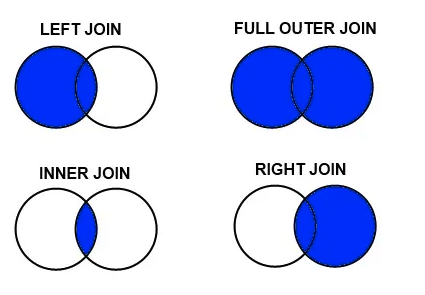




borrowed from [medium.com best visual sql joins](https://medium.com/swlh/the-best-visual-to-explain-sql-joins-612b95c81555)

In [ ]:
# Create DataFrames with indices
left = pd.DataFrame({
    'Value1': [1, 2, 3, 4]
}, index=['A', 'B', 'C', 'D'])

right = pd.DataFrame({
    'Value2': [5, 6, 7, 8]
}, index=['A', 'B', 'E', 'F'])
print("left:\n", left,'\n')
print("right:\n", right,'\n')




# Inner join (only common indices)
inner_join = left.join(right, how='inner')
print("Inner Join:\n", inner_join,'\n')

# Outer join (all indices, NaN for missing values)
outer_join = left.join(right, how='outer')
print("Outer Join:\n", outer_join,'\n')

# Left join (all indices from left DataFrame)
left_join = left.join(right, how='left')
print("Left Join:\n", left_join,'\n')

# Right join (all indices from right DataFrame)
right_join = left.join(right, how='right')
print("Right Join:\n", right_join)


### Merge

 merge allows for more flexibility in joining DataFrames using keys. You can specify which columns to use as keys for the join, and you can also join on multiple columns.

 ```pd.merge(left, right, on=key_column(s), how='join_type')```
 where left = df1
 and right = df2


In [ ]:
# Create DataFrames
left = pd.DataFrame({
    'Key': ['A', 'B', 'C', 'D'],
    'Value1': [1, 2, 3, 4]
})

right = pd.DataFrame({
    'Key': ['A', 'B', 'E', 'F'],
    'Value2': [5, 6, 7, 8]
})
print(left)
print(right,'\n\n')


# Inner merge (only common keys)
inner_merge = pd.merge(left, right, on='Key', how='inner')
print("Inner Merge:\n", inner_merge,'\n')

# Outer merge (all keys, NaN for missing values)
outer_merge = pd.merge(left, right, on='Key', how='outer')
print("Outer Merge:\n", outer_merge,'\n')

# Left merge (all keys from left DataFrame)
left_merge = pd.merge(left, right, on='Key', how='left')
print("Left Merge:\n", left_merge,'\n')

# Right merge (all keys from right DataFrame)
right_merge = pd.merge(left, right, on='Key', how='right')
print("Right Merge:\n", right_merge)

Wait is Merge and Join the same?

Merge, on a basic level, will more or less do the same thing but merge always for more flexibility with the ability to join on columns.

Take a look at this example:

In [ ]:
# Create DataFrames with indices
left = pd.DataFrame({'Key': ['A', 'B', 'C'],'Value1': [1, 2, 3]})
right = pd.DataFrame({'Key': ['B', 'C', 'D'],'Value2': [4, 5, 6]})
print(left)
print(right,'\n')

# Join on index
joined_df = left.join(right, how='outer',lsuffix='_')
print('Joined:\n',joined_df,'\n\n\n')

# Merge on 'Key' column
merged_df = pd.merge(left, right, on='Key', how='outer')
print('Merged:\n',merged_df)

### Exercises

1. Create two DataFrames, ```df1``` and ```df2```, with the following data:

```
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32]
})
```
```
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
})
```


1.   Perform an inner merge on the ID column.
2.   Perform an outer merge on the ID column.
3. Perform a left merge on the ID column.
4. Perform a right merge on the ID column.


2.Create two DataFrames, ```left_df``` and ```right_df```, with the following data:
```
left_df = pd.DataFrame({
    'Age': [24, 27, 22, 32],
}, index=['Alice', 'Bob', 'Charlie', 'David'])
```
```
right_df = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
}, index=['Charlie', 'David', 'Eve', 'Frank'])
```



1.   Perform an inner join on the indices.
2. Perform an outer join on the indices.
3. Perform a left join on the indices.
4. Perform a right join on the indices.



